# Wine Reviews


## 1. 数据可视化和摘要

该数据集是包括了许多葡萄酒的点评，有以下版本：


| name | description |
| ---- | ----------- |
| winemag-data_first150k | 第一版 15万葡萄酒点评 |
| winemag-data-130k-v2 | 第二版 去重后加入了点评者信息 |

本文选用第二版数据进行分析

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import pylab
%matplotlib inline


df = pd.read_csv('wine-reviews/winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### 1.1 数据摘要

- 标称属性和数值属性

In [2]:
numeric_fields = df.select_dtypes(include=np.number).columns.values
nominal_fields = df.select_dtypes(exclude=np.number).columns.values
print('Numeric fields:', numeric_fields)
print('Nominal fields:', nominal_fields)


Numeric fields: ['points' 'price']
Nominal fields: ['country' 'description' 'designation' 'province' 'region_1' 'region_2'
 'taster_name' 'taster_twitter_handle' 'title' 'variety' 'winery']


- 对标称属性，给出每个可能取值的频数

In [3]:
for name in nominal_fields:
    print(df.groupby(name).size())

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4472
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


title
1+1=3 2008 Rosé Cabernet Sauvignon (Penedès)                                             1
1+1=3 NV Brut Sparkling (Cava)                                                           2
1+1=3 NV Cygnus Brut Nature Reserva Made With Organic Grapes Sparkling (Cava)            2
1+1=3 NV Rosé Sparkling (Cava)                                                           1
10 Knots 2006 Beachcomber White (Paso Robles)                                            1
10 Knots 2006 Chardonnay (Santa Barbara County)                                          1
10 Knots 2009 Moonraker Grenache (Paso Robles)                                           1
10 Knots 2010 Viognier (Paso Robles)                                                     1
100 Percent Wine 2012 All Profits to Charity Red (California)                            1
100 Percent Wine 2014 All Profits to Charity Sauvignon Blanc (California)                1
100 Percent Wine 2015 Moscato (California)                                          

- 数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。

In [4]:
describe = df.describe()
total = len(df)
data = {}
for field in describe.columns:
    data[field] = total - describe[field]['count']

describe = describe.append(pd.Series(data, name='miss'))
describe

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000
miss,0.000000,8996.000000


### 1.2 数据的可视化


- 针对数值属性: 绘制直方图，用qq图检验其分布是否为正态分布。


points属性符合正态分布。

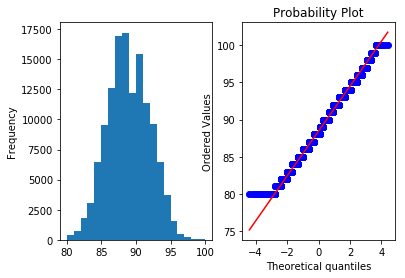

In [5]:
def hist_and_qqplot(series): 
    plt.subplot(1, 2, 1)
    series.plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(series, dist="norm", plot=pylab)
    
hist_and_qqplot(df['points'])

price属性不符合正态分布。


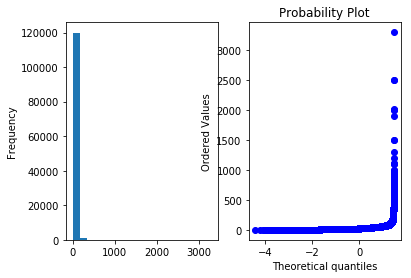

In [6]:
hist_and_qqplot(df['price'])

- 针对数值属性: 绘制盒图，对离群值进行识别

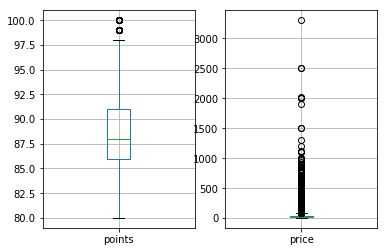

In [7]:
plt.subplot(1, 2, 1)
df.boxplot('points')
plt.subplot(1, 2, 2)
df.boxplot('price')

## 2. 数据缺失的处理

In [8]:
total = len(df)
data = {'counts': {}, 'percent': {}}
for field in df.columns:
    data['counts'][field] = total - df[field].count()
    data['percent'][field] = (total - df[field].count())/total
pd.DataFrame(data)

,counts,percent
country,63,0.000485
description,0,0.000000
designation,37465,0.288257
points,0,0.000000
price,8996,0.069215
province,63,0.000485
region_1,21247,0.163475
region_2,79460,0.611367
taster_name,26244,0.201922
taster_twitter_handle,31213,0.240154


### 2.1 缺失数据原因分析

观察数据集中缺失数据，分析其缺失的原因。

country, designation, province, region_1, region_2: 均为酿酒的地址信息，其中region2缺失最多，因为其粒度较细。

price: 缺少价格, 占0.6%, 可能是这部分品酒人未关注价格、价格丢失、写评价时忘记填写等。

taster_name, taster_twitter_handle: 品酒人信息，有的评价无法获取来源，或者是匿名评价。

variety: 种类, 只有1条缺失，可能是偶然缺失。

其中，只有价格是数值属性。

分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除




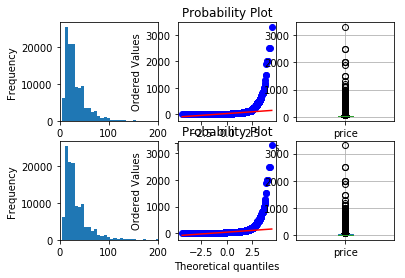

In [9]:
new_df = df.dropna(subset=['price'])


def plot_contract(dataframe, row):
    plt.subplot(2, 3, 1+3*row)
    new_df['price'].plot.hist(bins=500, xlim=(0, 200))
    plt.subplot(2, 3, 2+3*row)
    stats.probplot(new_df['price'], dist="norm", plot=pylab)
    plt.subplot(2, 3, 3+3*row)
    df.boxplot('price')


plot_contract(df, 0)
plot_contract(new_df, 1)

- 用最高频率值来填补缺失值



20.0


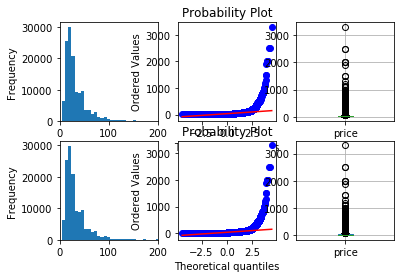

In [10]:
mode = df.mode()['price'][0]
new_df = df.fillna({'price': mode})
print(mode)

plot_contract(df, 0)
plot_contract(new_df, 1)

- 通过属性的相关关系来填补缺失值

可以观察到价格和评分存在正相关关系。所以建立线性回归模型，通过评分来预测价格。


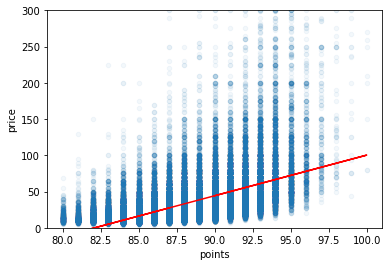

In [11]:
new_df = df.dropna(subset=['price'])
new_df.plot(kind="scatter", x="points", y="price", alpha=0.05)
x = new_df['points']
y = new_df['price']

from sklearn.linear_model import LinearRegression

X = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
plt.plot(X, model.predict(X), 'r-')
plt.ylim(0,300)
plt.show()


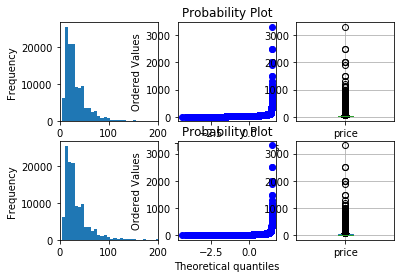

In [12]:
new_df = df.copy()
for index, row in new_df[df['price'].isna()].iterrows():
    row['price'] = model.predict(np.array(row['points']).reshape(-1, 1))

plot_contract(df, 0)
plot_contract(new_df, 1) 